In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
!pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas as pd#gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

  Cloning https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-6vuzo_2w
  Running command git clone --filter=blob:none --quiet https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-6vuzo_2w
  Resolved https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to commit b17a265d3b8253424e5b38872457f7437909a65d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
df = pd.read_csv('/content/drive/MyDrive/MA_Thesis/DBCommunity/saved_data/modeling_data.csv')
df

,Title,Post_ID,Text,Author,Author_ID,Reply,LastReply,PublishTime,Like,Collect,...,sentiment_score,Category,PostCount,ReplyCount,male_excluded,In_Replies,Out_Replies,In_Betweenness,Out_Betweenness,Reply_Bin
0,精华\n\n\n \n ...,1,由猴面包树组员倡议，我们小组建立官方slack交流群啦！为了营造一个更友好安全的交流氛围，目...,Anon加重音,1,1115,2023-12-21,2020-10-09,2,4,...,9.077597e-01,1,1,1,0,1021.0,9.0,0.015863,0.015863,1
1,精华\n\n\n \n ...,2,—————————本帖为问卷调查、招募研究对象的集中贴，姐妹们如有问卷调查需要大家帮忙填写或...,Anon加重音,1,64,2023-12-01,2020-10-14,1,2,...,1.599090e-01,1,2,5,0,1021.0,9.0,0.015863,0.015863,1
2,精华\n\n\n \n ...,3,前情(意见征集贴) https://www.douban.com/group/topic/1...,Anon加重音,1,12,2023-07-04,2020-10-10,4,6,...,1.000000e+00,1,3,1,0,1021.0,9.0,0.015863,0.015863,0
3,精华\n\n\n \n ...,4,论坛第二期分享会她说PhD：不同的人生路径的文字稿和音频分享来啦。非常感谢小组长们的全力支持...,Sophie,2,2,2023-05-03,2020-11-02,1,6,...,9.999413e-01,1,1,0,0,2.0,0.0,0.000216,0.000216,0
4,精华\n\n\n \n ...,5,09/30/21更新: 管理员实在是没有能力及时追踪所有申请相关的帖子，大家有相关的帖子想要...,丸子,3,6,2023-03-25,2020-12-09,2,2,...,2.440807e-08,1,1,1,0,10.0,1.0,0.000453,0.000453,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5249,分享一个本领域senior的采访内容,4331,这位前辈人非常好，成果很多，采访内容里虽然不少是本领域specific，但是其中关于pick...,路亦槑,2087,1,2020-09-19,2020-09-19,6,2,...,9.880279e-01,1,3,0,0,0.0,1.0,0.000011,0.000011,0
5250,精华\n\n\n \n ...,4332,组里真是人才济济呀，为了更好地整合与利用资源，将所有AMA帖子集合在这里，方便大家交流学习P...,Anon加重音,1,0,2020-09-19,2020-09-19,3,2,...,9.999863e-01,1,26,0,0,1021.0,9.0,0.015863,0.015863,0
5251,AMA｜美国文理学院做教职（理科）,4333,如题，关于美国文理学院（理科）教职申请、工作日常、工作环境、晋升要求、职业发展，欢迎提问！先...,多喜子,2447,4,2020-09-19,2020-09-18,5,7,...,9.908972e-01,1,1,0,0,0.0,0.0,0.000000,0.000000,0
5252,精华\n\n\n \n ...,4332,组里真是人才济济呀，为了更好地整合与利用资源，将所有AMA帖子集合在这里，方便大家交流学习P...,Anon加重音,1,0,2020-09-19,2020-09-19,3,2,...,9.999863e-01,1,27,0,0,1021.0,9.0,0.015863,0.015863,0


In [46]:
df.columns

Index(['Title', 'Post_ID', 'Text', 'Author', 'Author_ID', 'Reply', 'LastReply',
       'PublishTime', 'Like', 'Collect', 'Repost', 'Length', 'sentiment_label',
       'sentiment_score', 'Category', 'PostCount', 'ReplyCount',
       'male_excluded', 'In_Replies', 'Out_Replies', 'In_Betweenness',
       'Out_Betweenness', 'Reply_Bin'],
      dtype='object')

In [47]:
df_topic = pd.read_csv('/content/drive/MyDrive/MA_Thesis/DBCommunity/saved_data/topic_dpsk.csv', header = None)
df_topic.head()

,0,1,2,3
0,209,0,1,0
1,210,0,1,0
2,213,0,1,0
3,218,0,1,0
4,219,0,0,0


In [48]:
# prompt: Give df_topic headers: Post_ID, Feminism, Research_Advice, Emotional

df_topic.columns = ['Post_ID', 'Feminism', 'Research_Advice', 'Emotional']
df_topic.head()

,Post_ID,Feminism,Research_Advice,Emotional
0,209,0,1,0
1,210,0,1,0
2,213,0,1,0
3,218,0,1,0
4,219,0,0,0


In [49]:
# Drop duplicate Post_IDs in df_topic, keeping the first occurrence
df_topic_unique = df_topic.drop_duplicates(subset='Post_ID', keep='first')

# Perform a left join to keep all rows in df
df = pd.merge(df, df_topic_unique, on='Post_ID', how='left')

# Display the resulting dataframe
df

,Title,Post_ID,Text,Author,Author_ID,Reply,LastReply,PublishTime,Like,Collect,...,ReplyCount,male_excluded,In_Replies,Out_Replies,In_Betweenness,Out_Betweenness,Reply_Bin,Feminism,Research_Advice,Emotional
0,精华\n\n\n \n ...,1,由猴面包树组员倡议，我们小组建立官方slack交流群啦！为了营造一个更友好安全的交流氛围，目...,Anon加重音,1,1115,2023-12-21,2020-10-09,2,4,...,1,0,1021.0,9.0,0.015863,0.015863,1,1.0,0.0,0.0
1,精华\n\n\n \n ...,2,—————————本帖为问卷调查、招募研究对象的集中贴，姐妹们如有问卷调查需要大家帮忙填写或...,Anon加重音,1,64,2023-12-01,2020-10-14,1,2,...,5,0,1021.0,9.0,0.015863,0.015863,1,0.0,1.0,0.0
2,精华\n\n\n \n ...,3,前情(意见征集贴) https://www.douban.com/group/topic/1...,Anon加重音,1,12,2023-07-04,2020-10-10,4,6,...,1,0,1021.0,9.0,0.015863,0.015863,0,0.0,0.0,1.0
3,精华\n\n\n \n ...,4,论坛第二期分享会她说PhD：不同的人生路径的文字稿和音频分享来啦。非常感谢小组长们的全力支持...,Sophie,2,2,2023-05-03,2020-11-02,1,6,...,0,0,2.0,0.0,0.000216,0.000216,0,0.0,1.0,0.0
4,精华\n\n\n \n ...,5,09/30/21更新: 管理员实在是没有能力及时追踪所有申请相关的帖子，大家有相关的帖子想要...,丸子,3,6,2023-03-25,2020-12-09,2,2,...,1,0,10.0,1.0,0.000453,0.000453,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5249,分享一个本领域senior的采访内容,4331,这位前辈人非常好，成果很多，采访内容里虽然不少是本领域specific，但是其中关于pick...,路亦槑,2087,1,2020-09-19,2020-09-19,6,2,...,0,0,0.0,1.0,0.000011,0.000011,0,0.0,1.0,0.0
5250,精华\n\n\n \n ...,4332,组里真是人才济济呀，为了更好地整合与利用资源，将所有AMA帖子集合在这里，方便大家交流学习P...,Anon加重音,1,0,2020-09-19,2020-09-19,3,2,...,0,0,1021.0,9.0,0.015863,0.015863,0,0.0,1.0,0.0
5251,AMA｜美国文理学院做教职（理科）,4333,如题，关于美国文理学院（理科）教职申请、工作日常、工作环境、晋升要求、职业发展，欢迎提问！先...,多喜子,2447,4,2020-09-19,2020-09-18,5,7,...,0,0,0.0,0.0,0.000000,0.000000,0,0.0,1.0,0.0
5252,精华\n\n\n \n ...,4332,组里真是人才济济呀，为了更好地整合与利用资源，将所有AMA帖子集合在这里，方便大家交流学习P...,Anon加重音,1,0,2020-09-19,2020-09-19,3,2,...,0,0,1021.0,9.0,0.015863,0.015863,0,0.0,1.0,0.0


In [50]:
# prompt: print all missing values

import pandas as pd

# Assuming 'df' is your DataFrame
missing_values = df.isnull().sum()
missing_values


,0
Title,0
Post_ID,0
Text,0
Author,0
Author_ID,0
Reply,0
LastReply,0
PublishTime,0
Like,0
Collect,0


In [52]:
# Calculate positive_intensity and negative_intensity
def calculate_intensity(score):
    positive_intensity = score if score > 0.5 else 0.01  # Small value for negative cases
    negative_intensity = 1 - score if score < 0.5 else 0.01  # Small value for positive cases
    return positive_intensity, negative_intensity

# Apply the function to the sentiment_score column
df[['positive_intensity', 'negative_intensity']] = df['sentiment_score'].apply(
    lambda x: pd.Series(calculate_intensity(x))
)

# Display the updated DataFrame
df[['Text', 'sentiment_score', 'positive_intensity', 'negative_intensity']]


,Text,sentiment_score,positive_intensity,negative_intensity
0,由猴面包树组员倡议，我们小组建立官方slack交流群啦！为了营造一个更友好安全的交流氛围，目...,9.077597e-01,0.907760,0.010000
1,—————————本帖为问卷调查、招募研究对象的集中贴，姐妹们如有问卷调查需要大家帮忙填写或...,1.599090e-01,0.010000,0.840091
2,前情(意见征集贴) https://www.douban.com/group/topic/1...,1.000000e+00,1.000000,0.010000
3,论坛第二期分享会她说PhD：不同的人生路径的文字稿和音频分享来啦。非常感谢小组长们的全力支持...,9.999413e-01,0.999941,0.010000
4,09/30/21更新: 管理员实在是没有能力及时追踪所有申请相关的帖子，大家有相关的帖子想要...,2.440807e-08,0.010000,1.000000
...,...,...,...,...
5249,这位前辈人非常好，成果很多，采访内容里虽然不少是本领域specific，但是其中关于pick...,9.880279e-01,0.988028,0.010000
5250,组里真是人才济济呀，为了更好地整合与利用资源，将所有AMA帖子集合在这里，方便大家交流学习P...,9.999863e-01,0.999986,0.010000
5251,如题，关于美国文理学院（理科）教职申请、工作日常、工作环境、晋升要求、职业发展，欢迎提问！先...,9.908972e-01,0.990897,0.010000
5252,组里真是人才济济呀，为了更好地整合与利用资源，将所有AMA帖子集合在这里，方便大家交流学习P...,9.999863e-01,0.999986,0.010000


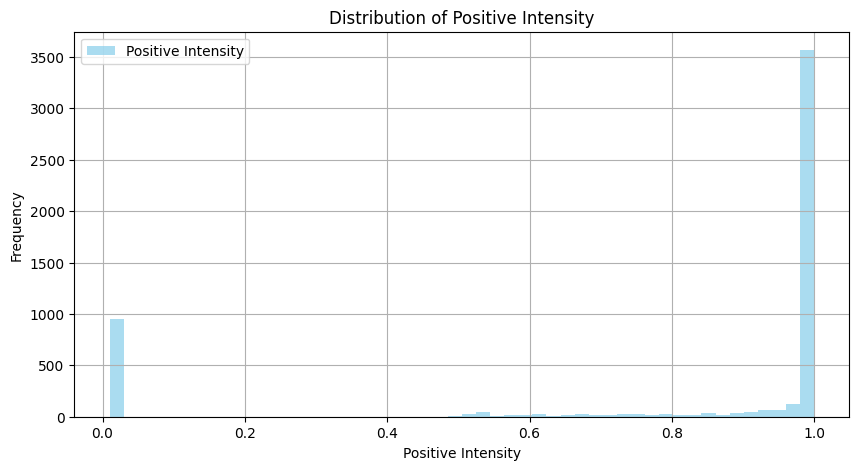

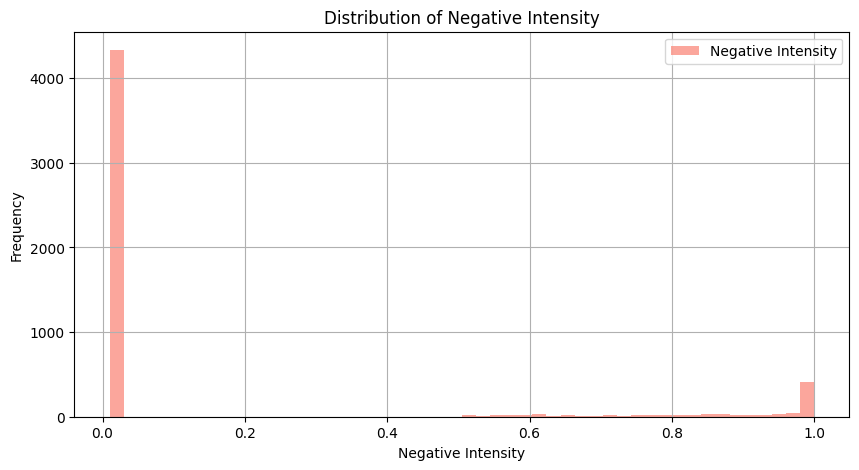

In [53]:
import matplotlib.pyplot as plt

# Plot the distribution of positive_intensity
plt.figure(figsize=(10, 5))
plt.hist(df['positive_intensity'], bins=50, color='skyblue', alpha=0.7, label='Positive Intensity')
plt.xlabel('Positive Intensity')
plt.ylabel('Frequency')
plt.title('Distribution of Positive Intensity')
plt.legend()
plt.grid(True)
plt.show()

# Plot the distribution of negative_intensity
plt.figure(figsize=(10, 5))
plt.hist(df['negative_intensity'], bins=50, color='salmon', alpha=0.7, label='Negative Intensity')
plt.xlabel('Negative Intensity')
plt.ylabel('Frequency')
plt.title('Distribution of Negative Intensity')
plt.legend()
plt.grid(True)
plt.show()



In [55]:
# prompt: show the percentage of 1 in "positive_intensity" and "negative_intensity" in df

# Calculate the percentage of 1s in 'positive_intensity'
positive_ones_percentage = (df['positive_intensity'] == 1).sum() / len(df) * 100

# Calculate the percentage of 1s in 'negative_intensity'
negative_ones_percentage = (df['negative_intensity'] == 1).sum() / len(df) * 100

print(f"Percentage of 1s in 'positive_intensity': {positive_ones_percentage:.2f}%")
print(f"Percentage of 1s in 'negative_intensity': {negative_ones_percentage:.2f}%")


Percentage of 1s in 'positive_intensity': 18.79%
Percentage of 1s in 'negative_intensity': 0.27%


In [57]:
# prompt: show the percentage of 0.01 in "positive_intensity" and "negative_intensity" in df

# Calculate the percentage of 0.01s in 'positive_intensity'
positive_001_percentage = (df['positive_intensity'] == 0.01).sum() / len(df) * 100

# Calculate the percentage of 0.01s in 'negative_intensity'
negative_001_percentage = (df['negative_intensity'] == 0.01).sum() / len(df) * 100

print(f"Percentage of 0.01 in 'positive_intensity': {positive_001_percentage:.2f}%")
print(f"Percentage of 0.01 in 'negative_intensity': {negative_001_percentage:.2f}%")


Percentage of 0.01 in 'positive_intensity': 18.16%
Percentage of 0.01 in 'negative_intensity': 82.43%


In [58]:
# Function to calculate the top 25% threshold and code the values
def code_intensity(column):
    # Filter out 0.01 values
    non_zero_values = df[df[column] > 0.01][column]
    # Get the 75th percentile
    threshold = non_zero_values.quantile(0.75)
    # Print the threshold
    print(f"{column} - Top 25% Threshold: {threshold}")
    # Code as 1 for top 25%, 0 for others
    return (df[column] > threshold).astype(int)

# Apply the function to both columns
df['positive_intensity_code'] = code_intensity('positive_intensity')
df['negative_intensity_code'] = code_intensity('negative_intensity')

# Display the updated DataFrame
print(df[['Text', 'positive_intensity', 'positive_intensity_code',
               'negative_intensity', 'negative_intensity_code']])


positive_intensity - Top 25% Threshold: 0.9999999999999984
negative_intensity - Top 25% Threshold: 0.9991458179471933
                                                   Text  positive_intensity  \
0     由猴面包树组员倡议，我们小组建立官方slack交流群啦！为了营造一个更友好安全的交流氛围，目...            0.907760   
1     —————————本帖为问卷调查、招募研究对象的集中贴，姐妹们如有问卷调查需要大家帮忙填写或...            0.010000   
2     前情(意见征集贴) https://www.douban.com/group/topic/1...            1.000000   
3     论坛第二期分享会她说PhD：不同的人生路径的文字稿和音频分享来啦。非常感谢小组长们的全力支持...            0.999941   
4     09/30/21更新: 管理员实在是没有能力及时追踪所有申请相关的帖子，大家有相关的帖子想要...            0.010000   
...                                                 ...                 ...   
5249  这位前辈人非常好，成果很多，采访内容里虽然不少是本领域specific，但是其中关于pick...            0.988028   
5250  组里真是人才济济呀，为了更好地整合与利用资源，将所有AMA帖子集合在这里，方便大家交流学习P...            0.999986   
5251  如题，关于美国文理学院（理科）教职申请、工作日常、工作环境、晋升要求、职业发展，欢迎提问！先...            0.990897   
5252  组里真是人才济济呀，为了更好地整合与利用资源，将所有AMA帖子集合在这里，方便大家交流学习P...            0.999986   
5253  如题，关于美国

In [59]:
# prompt: the percentage of 1 in 'positive_intensity_code' and 'negative_intensity_code'

# Calculate the percentage of 1s in 'positive_intensity_code'
positive_code_ones_percentage = (df['positive_intensity_code'] == 1).sum() / len(df) * 100

# Calculate the percentage of 1s in 'negative_intensity_code'
negative_code_ones_percentage = (df['negative_intensity_code'] == 1).sum() / len(df) * 100

print(f"Percentage of 1s in 'positive_intensity_code': {positive_code_ones_percentage:.2f}%")
print(f"Percentage of 1s in 'negative_intensity_code': {negative_code_ones_percentage:.2f}%")


Percentage of 1s in 'positive_intensity_code': 20.44%
Percentage of 1s in 'negative_intensity_code': 4.40%


In [62]:
df.to_csv('/content/drive/MyDrive/MA_Thesis/DBCommunity/saved_data/modeling_data_final.csv', index=False)

# Second Attempt

In [8]:
# prompt: read '/content/drive/MyDrive/MA_Thesis/DBCommunity/saved_data/modeling_data_final.xlsx'

import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/MA_Thesis/DBCommunity/saved_data/modeling_data_final.xlsx")
df


,Title,Post_ID,Text,Author,Author_ID,Reply,LastReply,PublishTime,Like,Collect,...,In_Betweenness,Out_Betweenness,Reply_Bin,Feminism,Research_Advice,Emotional,positive_intensity,negative_intensity,positive_intensity_code,negative_intensity_code
0,精华\n\n\n \n ...,1,由猴面包树组员倡议，我们小组建立官方slack交流群啦！为了营造一个更友好安全的交流氛围，目...,Anon加重音,1,1115,2023-12-21,2020-10-09,2,4,...,0.015863,0.015863,1,1,0,0,1.000000,0.01,0,0
1,精华\n\n\n \n ...,2,—————————本帖为问卷调查、招募研究对象的集中贴，姐妹们如有问卷调查需要大家帮忙填写或...,Anon加重音,1,64,2023-12-01,2020-10-14,1,2,...,0.015863,0.015863,1,0,1,0,0.010000,1.00,0,0
2,精华\n\n\n \n ...,3,前情(意见征集贴) https://www.douban.com/group/topic/1...,Anon加重音,1,12,2023-07-04,2020-10-10,4,6,...,0.015863,0.015863,0,0,0,1,1.000000,0.01,0,0
3,精华\n\n\n \n ...,4,论坛第二期分享会她说PhD：不同的人生路径的文字稿和音频分享来啦。非常感谢小组长们的全力支持...,Sophie,2,2,2023-05-03,2020-11-02,1,6,...,0.000216,0.000216,0,0,1,0,0.999941,0.01,0,0
4,精华\n\n\n \n ...,5,09/30/21更新: 管理员实在是没有能力及时追踪所有申请相关的帖子，大家有相关的帖子想要...,丸子,3,6,2023-03-25,2020-12-09,2,2,...,0.000453,0.000453,0,0,1,0,0.010000,1.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5249,分享一个本领域senior的采访内容,4331,这位前辈人非常好，成果很多，采访内容里虽然不少是本领域specific，但是其中关于pick...,路亦槑,2087,1,2020-09-19,2020-09-19,6,2,...,0.000011,0.000011,0,0,1,0,0.988028,0.01,0,0
5250,精华\n\n\n \n ...,4332,组里真是人才济济呀，为了更好地整合与利用资源，将所有AMA帖子集合在这里，方便大家交流学习P...,Anon加重音,1,0,2020-09-19,2020-09-19,3,2,...,0.015863,0.015863,0,0,1,0,0.999986,0.01,0,0
5251,AMA｜美国文理学院做教职（理科）,4333,如题，关于美国文理学院（理科）教职申请、工作日常、工作环境、晋升要求、职业发展，欢迎提问！先...,多喜子,2447,4,2020-09-19,2020-09-18,5,7,...,0.000000,0.000000,0,0,1,0,0.990897,0.01,0,0
5252,精华\n\n\n \n ...,4332,组里真是人才济济呀，为了更好地整合与利用资源，将所有AMA帖子集合在这里，方便大家交流学习P...,Anon加重音,1,0,2020-09-19,2020-09-19,3,2,...,0.015863,0.015863,0,0,1,0,0.999986,0.01,0,0


In [11]:
df.columns

Index(['Title', 'Post_ID', 'Text', 'Author', 'Author_ID', 'Reply', 'LastReply',
       'PublishTime', 'Like', 'Collect', 'Repost', 'Length', 'sentiment_label',
       'sentiment_score', 'Category', 'PostCount', 'ReplyCount',
       'male_excluded', 'In_Replies', 'Out_Replies', 'In_Betweenness',
       'Out_Betweenness', 'Reply_Bin', 'Feminism', 'Research_Advice',
       'Emotional', 'positive_intensity', 'negative_intensity',
       'positive_intensity_code', 'negative_intensity_code'],
      dtype='object')

In [12]:
import pandas as pd

# Ensure 'PublishTime' is in datetime format
df['PublishTime'] = pd.to_datetime(df['PublishTime'])

# Sort the dataframe by PublishTime to ensure cumulative count is calculated correctly
df = df.sort_values(by=['Author', 'PublishTime'])

# Compute cumulative PostCount and ReplyCount for each author
df['PostCount'] = df.groupby('Author').cumcount() + 1
df['ReplyCount'] = df.groupby('Author')['Reply'].cumsum()

# Find the highest PostCount and ReplyCount for each author and include Author_ID
df_user_frequency = df.groupby(['Author', 'Author_ID'])[['PostCount', 'ReplyCount']].max().reset_index()

# Display the new dataframe
df_user_frequency


,Author,Author_ID,PostCount,ReplyCount
0,0,805,7,250
1,0.99,1341,5,65
2,1,2171,2,5
3,7,1059,2,58
4,11,736,2,20
...,...,...,...,...
2442,🦖,2259,1,16
2443,🦞,2245,1,2
2444,🦷🦷乐,217,3,8
2445,🧸,609,1,5


In [13]:
# Rename columns
df_user_frequency = df_user_frequency.rename(columns={'PostCount': 'PostCount_total', 'ReplyCount': 'ReplyCount_total'})

# merge
df = df.merge(df_user_frequency, on=['Author', 'Author_ID'], how='left')
df

,Title,Post_ID,Text,Author,Author_ID,Reply,LastReply,PublishTime,Like,Collect,...,Reply_Bin,Feminism,Research_Advice,Emotional,positive_intensity,negative_intensity,positive_intensity_code,negative_intensity_code,PostCount_total,ReplyCount_total
0,如何判断自己是否适合读社科phd ?,3061,真的非常感谢大家的建议和鼓励。,0,805,70,2021-05-05,2020-11-18,5,1,...,1,0,0,0,1.000000,0.010000,0,0,7,250
1,Phd RP的研究地点可以设置在申请校所在国之外吗？,2589,抱歉打扰。想问下大家博士rp里的研究背景可以设置在申请校所在国之外吗？我是读/申 socio...,0,805,4,2021-09-21,2021-09-21,1,1,...,0,0,1,0,1.000000,0.010000,0,0,7,250
2,Phd RP的研究地点可以设置在申请校所在国之外吗？,2589,抱歉打扰。想问下大家博士rp里的研究背景可以设置在申请校所在国之外吗？我是读/申 socio...,0,805,4,2021-09-21,2021-09-21,1,1,...,0,0,1,0,1.000000,0.010000,0,0,7,250
3,套瓷信回复咨询！,1206,抱歉打扰大家。收到了一份新加坡教授的套瓷信回复（社科专业），想问下大家这样的中性回复是否意味...,0,805,21,2022-09-28,2021-10-01,4,7,...,1,0,1,1,0.930008,0.010000,0,0,7,250
4,求助｜Phd面试后的邮件回复！,2368,update 一下！导师回复啦！给了很详细的建议还有之后的安排！总之很感谢大家！我们申请季都...,0,805,4,2021-11-12,2021-11-12,3,0,...,0,0,1,1,1.000000,0.010000,0,0,7,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5249,很焦虑，没办法真正的认可自己,282,觉得自己不会来事，不知道有什么资本做academia看着local同学左右逢源，真的希望自己...,🦷🦷乐,217,0,2023-09-19,2023-09-19,2,0,...,0,0,0,1,0.988458,0.010000,0,0,3,8
5250,很焦虑，没办法真正的认可自己,282,觉得自己不会来事，不知道有什么资本做academia看着local同学左右逢源，真的希望自己...,🦷🦷乐,217,0,2023-09-19,2023-09-19,2,0,...,0,0,0,1,0.988458,0.010000,0,0,3,8
5251,要不要申欧洲PhD，要不要gap,856,Bg:一年英硕在读，社科专业，只考虑全奖读博\n\n之前只套磁了英国导师，套到了但是没有奖，...,🧸,609,5,2023-02-10,2023-02-08,1,1,...,0,0,1,1,1.000000,0.010000,1,0,1,5
5252,想问各位姐妹会有疲惫的缓不过来的时候嘛。,3816,国内医学硕士三年级 日历上来看虽然离毕业还有半年但实际上所有的考博/工作/毕业论文/给导师搬...,🩵,1637,16,2020-11-25,2020-11-24,1,1,...,0,0,0,1,0.999605,0.010000,0,0,2,16


# Identify those who success after receiving help

In [16]:
# Ensure PublishTime is in datetime format
df['PublishTime'] = pd.to_datetime(df['PublishTime'])

# Sort by Author_ID and PublishTime to maintain chronological order
df.sort_values(by=['Author_ID', 'PublishTime'], inplace=True)

# Identify authors who posted support-seeking (0) first and then support-providing (1)
def check_success(group):
    provide_shifted = group['Provide'].shift(1)
    return ((provide_shifted == 0) & (group['Provide'] == 1)).any()

successful_author_ids = df.groupby('Author_ID').apply(check_success)
successful_author_ids = successful_author_ids[successful_author_ids].index

# Get details of these successful authors
successful_df = df[df['Author_ID'].isin(successful_author_ids)][['Author', 'Author_ID']].drop_duplicates()

# Display the result
successful_df


,Author,Author_ID
145,Anon加重音,1
2459,丸子,3
1184,doe,4
2199,your chance,5
1409,momo,7
...,...,...
4378,章悦,2090
4291,皮酷珠,2164
2260,❤,2207
506,KCW,2284


In [17]:
# Add a column to represent successful authors as 1, others as 0
df['Success'] = df['Author_ID'].isin(successful_author_ids).astype(int)

# Display the updated dataframe
df


,Title,Post_ID,Text,Author,Author_ID,Reply,LastReply,PublishTime,Like,Collect,...,Research_Advice,Emotional,positive_intensity,negative_intensity,positive_intensity_code,negative_intensity_code,PostCount_total,ReplyCount_total,Provide,Success
145,计算机与社会科学交叉学科PhD,1378,抛砖引玉一下～我美本时是CS专业/Econ&Applied Math minor，由于对社会...,Anon加重音,1,68,2022-08-15,2020-09-18,7,1,...,1,1,1.000000,0.01,0,0,27,1627,1,1
146,精华\n\n\n \n ...,3369,继续抛砖引玉一下，欢迎大家补充分享。这个话题其实是受我最近rotation组的导师启发，好东...,Anon加重音,1,37,2021-02-24,2020-09-18,2,1,...,0,0,0.989961,0.01,0,0,27,1627,1,1
147,写在开组之际,4327,看到豆瓣新开了women in tech和women in biotech/pharma小组...,Anon加重音,1,13,2020-09-23,2020-09-18,1,2,...,0,0,1.000000,0.01,1,0,27,1627,1,1
148,遇到hands off的导师如何选题并开展project？,4330,本科时的老板和他高年级phd带我比较hands on一点，所以选题和细节都可以得到很详细的建...,Anon加重音,1,7,2020-09-19,2020-09-18,1,7,...,1,1,0.997816,0.01,0,0,27,1627,0,1
149,学术讨论时对方提到的人名/论文并没有听说过怎么办？,4278,1:1的时候会遇到对方提到个什么人或者论文然而自己并没有听说过的情况，想问问大家都是怎么处理...,Anon加重音,1,9,2020-10-04,2020-09-19,1,1,...,0,1,0.609229,0.01,0,0,27,1627,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3247,希望了解下计算社科领域,4318,"楼主是学管理的博士，领域使用的主要还是一些基本的回归，DID,IV,或者实验方法，最近感到c...",宁丫头,2444,9,2020-09-25,2020-09-25,4,3,...,1,0,1.000000,0.01,0,0,1,9,0,0
2246,提问｜计算机相关国外研究生求建议,4323,lz是2020届上海中等985本科生毕业，专业软件工程，绩点85分，托福因为之前取消了考试现...,zxxxxy,2445,5,2020-09-24,2020-09-23,1,1,...,1,1,1.000000,0.01,1,0,1,5,0,0
3842,求解答 有关电子通信类的考研资讯,4326,本人通信工程大三生 准备考研 但是在思考考本专业的研究生还是考其他专业 还有 电子通信类的研...,梁白开了,2446,2,2020-09-23,2020-09-21,0,0,...,1,0,1.000000,0.01,0,0,1,2,0,0
3116,AMA｜美国文理学院做教职（理科）,4333,如题，关于美国文理学院（理科）教职申请、工作日常、工作环境、晋升要求、职业发展，欢迎提问！先...,多喜子,2447,4,2020-09-19,2020-09-18,5,7,...,1,0,0.990897,0.01,0,0,2,8,1,0


In [19]:
# Identify duplicated posts using Post_ID
duplicated_posts = df[df.duplicated(subset=['Post_ID'], keep=False)]

# Count the number of duplications for each Post_ID
duplication_count = duplicated_posts['Post_ID'].value_counts().reset_index()
duplication_count.columns = ['Post_ID', 'DuplicationCount']

# Calculate the total number of duplications
total_duplications = duplication_count['DuplicationCount'].sum() - len(duplication_count)

# Display duplicated Post_IDs and their duplication count
print("Duplicated Post_IDs and Their Duplication Count:")
print(duplication_count)

# Display total number of duplications
print("\nTotal Number of Duplications:", total_duplications)


Duplicated Post_IDs and Their Duplication Count:
     Post_ID  DuplicationCount
0       1440                14
1        406                10
2         33                 9
3        350                 9
4       2130                 5
..       ...               ...
876     2967                 2
877     2258                 2
878      766                 2
879     2687                 2
880     4333                 2

[881 rows x 2 columns]

Total Number of Duplications: 921


In [20]:
# Step 1: Drop Exact Duplicates
df.drop_duplicates(subset=['Post_ID'], keep='first', inplace=True)

# Step 2: Handle Near Duplicates
# If needed, keep the earliest occurrence by PublishTime
df.sort_values(by=['Post_ID', 'PublishTime'], inplace=True)
df = df.drop_duplicates(subset=['Post_ID'], keep='first')

# Step 3: Verify the result
print("Number of unique posts after handling duplicates:", df['Post_ID'].nunique())


Number of unique posts after handling duplicates: 4333


In [21]:
df

,Title,Post_ID,Text,Author,Author_ID,Reply,LastReply,PublishTime,Like,Collect,...,Research_Advice,Emotional,positive_intensity,negative_intensity,positive_intensity_code,negative_intensity_code,PostCount_total,ReplyCount_total,Provide,Success
157,精华\n\n\n \n ...,1,由猴面包树组员倡议，我们小组建立官方slack交流群啦！为了营造一个更友好安全的交流氛围，目...,Anon加重音,1,1115,2023-12-21,2020-10-09,2,4,...,0,0,1.000000,0.01,0,0,27,1627,1,1
159,精华\n\n\n \n ...,2,—————————本帖为问卷调查、招募研究对象的集中贴，姐妹们如有问卷调查需要大家帮忙填写或...,Anon加重音,1,64,2023-12-01,2020-10-14,1,2,...,1,0,0.010000,1.00,0,0,27,1627,1,1
158,精华\n\n\n \n ...,3,前情(意见征集贴) https://www.douban.com/group/topic/1...,Anon加重音,1,12,2023-07-04,2020-10-10,4,6,...,0,1,1.000000,0.01,0,0,27,1627,1,1
920,精华\n\n\n \n ...,4,论坛第二期分享会她说PhD：不同的人生路径的文字稿和音频分享来啦。非常感谢小组长们的全力支持...,Sophie,2,2,2023-05-03,2020-11-02,1,6,...,1,0,0.999941,0.01,0,0,6,88,1,0
2462,精华\n\n\n \n ...,5,09/30/21更新: 管理员实在是没有能力及时追踪所有申请相关的帖子，大家有相关的帖子想要...,丸子,3,6,2023-03-25,2020-12-09,2,2,...,1,0,0.010000,1.00,0,1,8,136,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,你认为最有用的mailing list,4329,每个field/area都有自己不同的mailing list，很多导师都会通过这个mail...,Magritte,351,1,2020-09-21,2020-09-20,3,7,...,1,0,0.620534,0.01,0,0,6,56,1,0
148,遇到hands off的导师如何选题并开展project？,4330,本科时的老板和他高年级phd带我比较hands on一点，所以选题和细节都可以得到很详细的建...,Anon加重音,1,7,2020-09-19,2020-09-18,1,7,...,1,1,0.997816,0.01,0,0,27,1627,0,1
4837,分享一个本领域senior的采访内容,4331,这位前辈人非常好，成果很多，采访内容里虽然不少是本领域specific，但是其中关于pick...,路亦槑,2087,1,2020-09-19,2020-09-19,6,2,...,1,0,0.988028,0.01,0,0,3,45,1,0
150,精华\n\n\n \n ...,4332,组里真是人才济济呀，为了更好地整合与利用资源，将所有AMA帖子集合在这里，方便大家交流学习P...,Anon加重音,1,0,2020-09-19,2020-09-19,3,2,...,1,0,0.999986,0.01,0,0,27,1627,1,1


In [23]:
# Analyze missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)

# Analyze missing values as a percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nMissing Values Percentage per Column:\n", missing_percentage)


Missing Values per Column:
 Title                      0
Post_ID                    0
Text                       0
Author                     0
Author_ID                  0
Reply                      0
LastReply                  0
PublishTime                0
Like                       0
Collect                    0
Repost                     0
Length                     0
sentiment_label            0
sentiment_score            0
PostCount                  0
ReplyCount                 0
male_excluded              0
In_Replies                 0
Out_Replies                0
In_Betweenness             0
Out_Betweenness            0
Reply_Bin                  0
Feminism                   0
Research_Advice            0
Emotional                  0
positive_intensity         0
negative_intensity         0
positive_intensity_code    0
negative_intensity_code    0
PostCount_total            0
ReplyCount_total           0
Provide                    0
Success                    0
dtype: int64

M

In [22]:
df.to_excel('/content/drive/MyDrive/MA_Thesis/DBCommunity/saved_data/modeling_data_final_2.xlsx', index=False)